In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import pickle
from functools import reduce
from dateutil.relativedelta import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import sys 
sys.path.append('D:/sciebo/Montreal/Code/')
sys.path.append('D:/sciebo/Montreal/Code/ERC_data_helpers/')
import ERC_data_helpers as ERC

In [6]:
ERC.plot.ERC_Management().set_plot_params()
fig_width = 6.3
lw=0.5

In [7]:
from helpers import load_data

## Load data
start_date = '2023-02-01 01:00:00' #gut um nans zu zeigen
end_date = '2023-02-28 02:05:00'
data_raw = load_data.load_raw_data(start_date, end_date)

In [ ]:
## Februar Daten haben alles, um den Effekt vom Resampling zu analysieren: am Anfang an-aus (Volumenstrom), danach konstanter Volumenstrom mit hoch und runter in der Temperatur. 

In [ ]:
#df_mean = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in']))

In [8]:
df_weighted = pd.DataFrame()

for probe in np.arange(1,41,1):
    probe = f'{probe:02d}'
    try:
        df_weighted[f'Probe_{probe}_T_in'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in'], weights=x[f'Probe_{probe}_V_dot']))
        df_weighted[f'Probe_{probe}_T_out'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in'], weights=x[f'Probe_{probe}_V_dot']))
        df_weighted[f'Probe_{probe}_V_dot'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_V_dot'], weights=x[f'Probe_{probe}_V_dot']))
    except:
        df_weighted[f'Probe_{probe}_T_in'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in']))
        df_weighted[f'Probe_{probe}_T_out'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in']))
        df_weighted[f'Probe_{probe}_V_dot'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_V_dot']))


C:\Users\Elisa\AppData\Local\Temp\ipykernel_17332\4245493291.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weighted[f'Probe_{probe}_T_out'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in'], weights=x[f'Probe_{probe}_V_dot']))
C:\Users\Elisa\AppData\Local\Temp\ipykernel_17332\4245493291.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_weighted[f'Probe_{probe}_V_dot'] = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_V_dot'], weights=x[f'Probe_{probe}_V_dot']))
C

In [9]:
m = ERC.plot.ERC_Management()
west_in, south_in, east_in = m.generate_ID_strings_per_shaft(after='_T_in')
west_out, south_out, east_out = m.generate_ID_strings_per_shaft(after='_T_out')
west_vdot, south_vdot, east_vdot = m.generate_ID_strings_per_shaft(after='_V_dot')
all_color_dict = m.create_colordict(after='_T_out')
all_color_dict_in = m.create_colordict(after='_T_in')

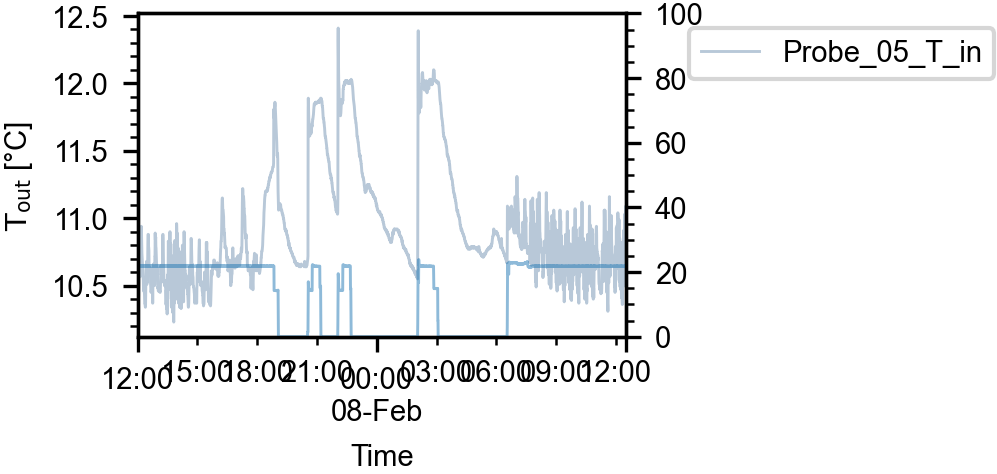

In [14]:
t1 = '2023-02-07 12:00:00'
t2 = '2023-02-08 12:30:00'
fromd = 4
until = 5
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)
ax2 = ax.twinx()
ax2.set_ylim(0,100)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, alpha=.5, linewidth=lw+.2, label='30s')
#df_weighted.loc[t1:t2][west_in[fromd:until]].plot(ax=ax[0], legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw, label='5min - weighted')
#data_mean.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linestyle='--', linewidth=lw, label='5 min - mean')
#data_median.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=True, color=[all_color_dict.get(x, 'k') for x in west_in[fromd:until]], linestyle='-.', linewidth=lw, alpha=.5, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

ax.legend(bbox_to_anchor=(1.1,1))
#fig.savefig('30s_5min_data1.pdf', bbox_inches='tight')

NameError: name 'data_mean' is not defined

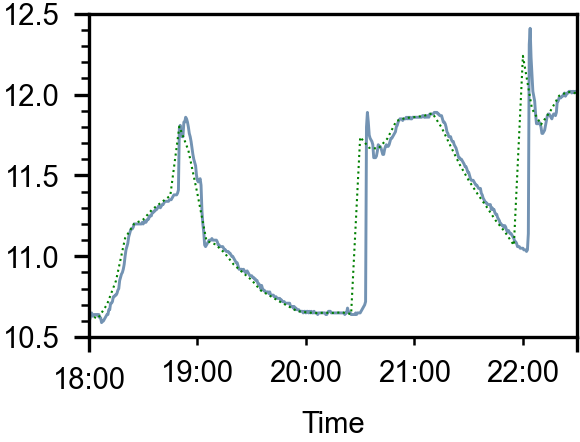

In [15]:
t1 = '2023-02-07 18:00:00'
t2 = '2023-02-07 22:30:00'
fromd = 4
until = 5
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)

ax.set_ylim(10.5,12.5)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, color='green', linestyle='dotted', linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[fromd:until]].plot(ax = ax, legend=False, color='red', linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=True, color='orange', linestyle='-.', linewidth=lw, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['original', 'weighted mean', 'mean', 'median']

ax2 = ax.twinx()
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, linewidth=lw+.2, color='gray')
ax2.set_ylim(0,100)

legend = ax.legend(handles=handles, labels = labels, bbox_to_anchor=(1.1,1))

fig.savefig('mean_median_weightedmean.png', bbox_inches='tight')

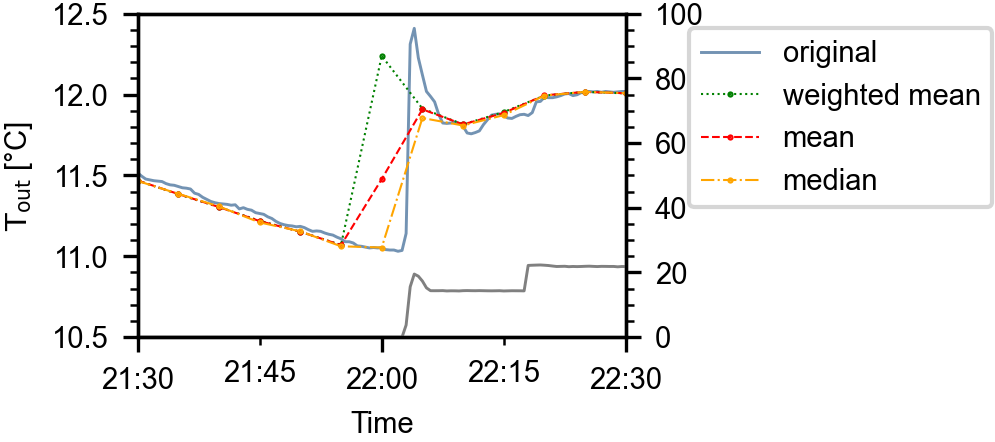

In [46]:
t1 = '2023-02-07 21:30:00'
t2 = '2023-02-07 22:30:00'
fromd = 4
until = 5
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)

ax.set_ylim(10.5,12.5)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax=ax, legend=False, color='green', linestyle='dotted', linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax = ax, legend=False, color='red', linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax = ax, legend=True, color='orange', linestyle='-.', linewidth=lw, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['original', 'weighted mean', 'mean', 'median']

ax2 = ax.twinx()
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, linewidth=lw+.2, color='gray')
ax2.set_ylim(0,100)

legend = ax.legend(handles=handles, labels = labels, bbox_to_anchor=(1.1,1))

#fig.savefig('mean_median_weightedmean2.png', bbox_inches='tight')

NameError: name 'data_mean' is not defined

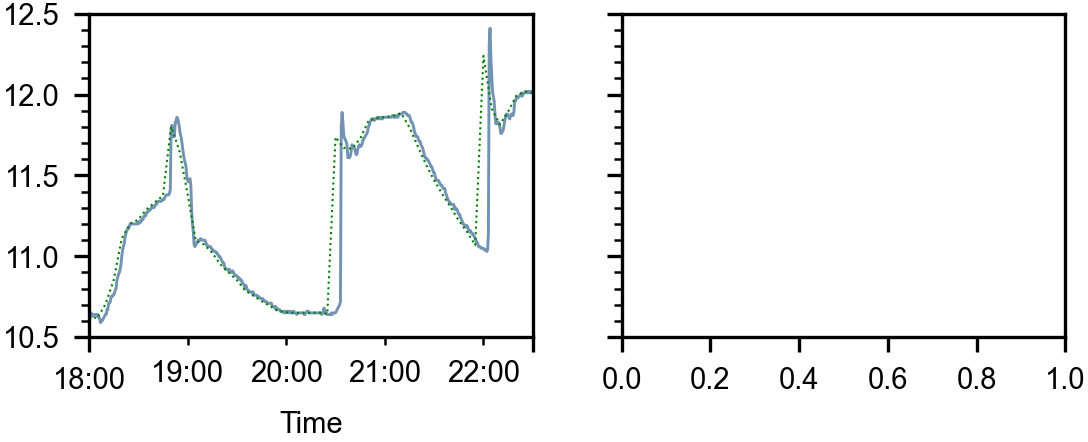

In [16]:
t1 = '2023-02-07 18:00:00'
t2 = '2023-02-07 22:30:00'
fromd = 4
until = 5
fig, ax = plt.subplots(1,2, figsize=(fig_width/1.5, 1.4), dpi=300, sharey=True)

ax[0].set_ylim(10.5,12.5)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax[0], legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[fromd:until]].plot(ax=ax[0], legend=False, color='green', linestyle='dotted', linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=False, color='red', linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=False, color='orange', linestyle='-.', linewidth=lw, label= '5 min - median')

ax2 = ax[0].twinx()
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, linewidth=lw+.2, color='gray')
ax2.set_ylim(0,100)


### no 2
t1 = '2023-02-07 21:30:00'
t2 = '2023-02-07 22:30:00'
fromd = 4
until = 5

data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax[1], legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax=ax[1], legend=False, color='green', linestyle='dotted', linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax = ax[1], legend=False, color='red', linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[fromd:until]].plot(marker='.', markersize=1, ax = ax[1], legend=False, color='orange', linestyle='-.', linewidth=lw, label= '5 min - median')
ax[0].set_ylabel('$\mathrm{T_{in}}$ [°C]')

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.append(handles2[0])
labels = ['original', 'weighted mean', 'mean', 'median', 'Volume flow']

ax2 = ax[1].twinx()
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, linewidth=lw+.2, color='gray')
ax2.set_ylim(0,100)

legend = ax[1].legend(handles=handles, labels = labels, bbox_to_anchor=(1.2,1))
ax2.set_ylabel('$\mathrm{V_{dot}}$ [l/min]')
fig.suptitle('Comparison of data resampling methods')
#fig.savefig('Comparison_data_resampling_methods.pdf', bbox_inches='tight')

In [66]:
handles, labels

([<matplotlib.lines.Line2D at 0x20fca176740>,
 ['original', 'weighted mean', 'mean', 'median', 'Volume flow'])

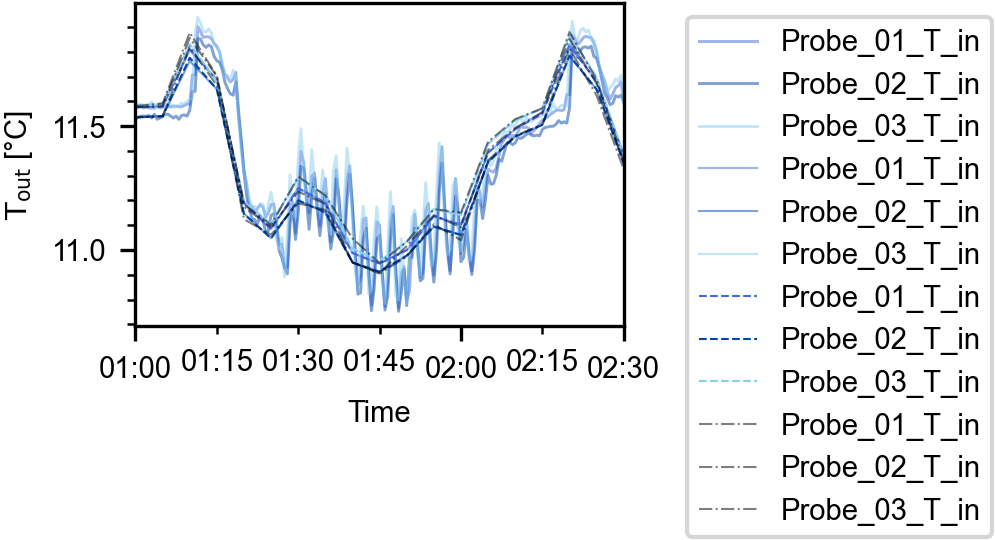

In [76]:
t1 = '2023-02-01 01:00:00'
t2 = '2023-02-01 02:30:00'
until = 1
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)
data_raw.loc[t1:t2][west_in[:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[:until]].plot(ax = ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[:until]].plot(ax = ax, legend=True, color=[all_color_dict.get(x, 'k') for x in west_in[:until]], linestyle='-.', linewidth=lw, alpha=.5, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

ax.legend(bbox_to_anchor=(1.1,1))
#fig.savefig('30s_5min_data1.pdf', bbox_inches='tight')

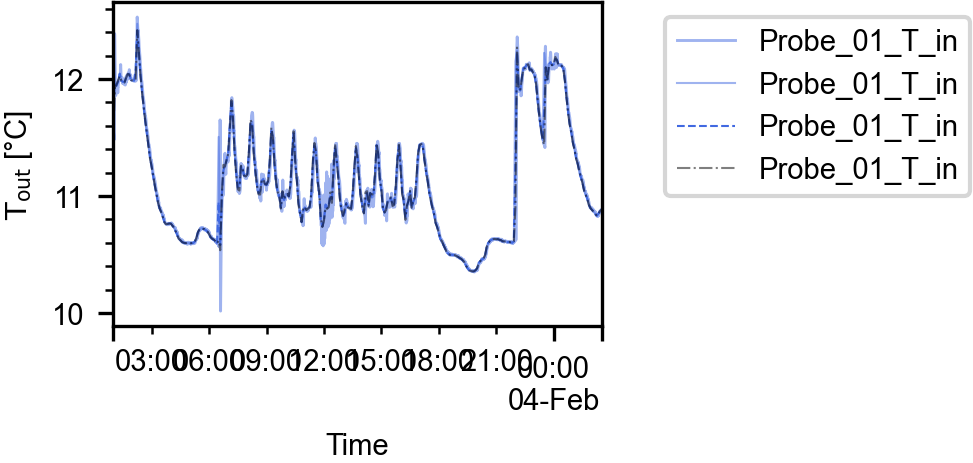

In [77]:
t1 = '2023-02-03 01:00:00'
t2 = '2023-02-04 02:30:00'
until = 1
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)
data_raw.loc[t1:t2][west_in[:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_in[:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linewidth=lw, label='5min - weighted')
data_mean.loc[t1:t2][west_in[:until]].plot(ax = ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[:until]], linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[:until]].plot(ax = ax, legend=True, color=[all_color_dict.get(x, 'k') for x in west_in[:until]], linestyle='-.', linewidth=lw, alpha=.5, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

ax.legend(bbox_to_anchor=(1.1,1))
#fig.savefig('30s_5min_data1.pdf', bbox_inches='tight')

In [84]:
probe = '18'
test = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in'], weights=x[f'Probe_{probe}_V_dot']))
test_vol = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_V_dot']))

(10.0, 100.0)

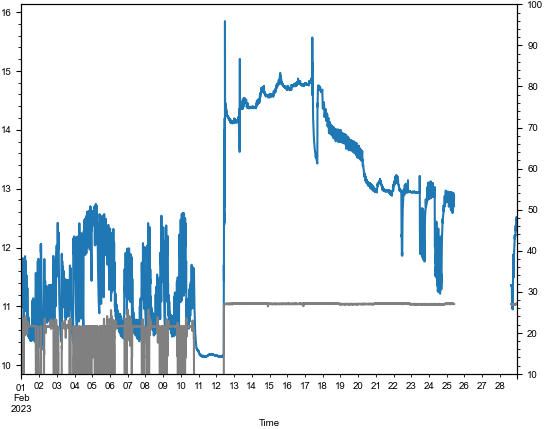

In [87]:
fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()

test.plot(ax=ax)
test_vol.plot(ax=ax2, y=f'Probe_{probe}_V_dot', color='gray')
ax2.set_ylim(10,100)